In [12]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Defining the bucket
s3 = boto3.resource('s3')
bucket_name = 'omar-vargas-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the csv file
file_key = 'MarketingData.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
marketing_data = pd.read_csv(file_content_stream)
marketing_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [13]:
marketing_data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

<AxesSubplot: xlabel='Channel', ylabel='Fresh'>

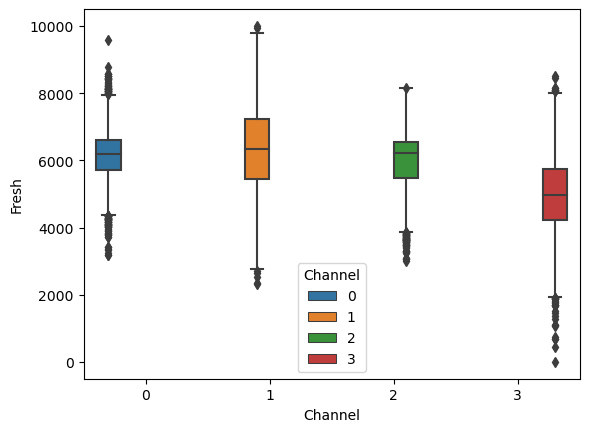

In [14]:
## Creating visualization of Fresh by Channel
sns.boxplot(x = 'Channel', y = 'Fresh', hue = 'Channel', data = marketing_data)

In [ ]:
# From the above plot, we can see that fresh items are least purchased from the TV while Reatil and ROad Show have similar means.
# Although Reatil has a smaller range and more outliers.

<AxesSubplot: xlabel='Channel', ylabel='Frozen'>

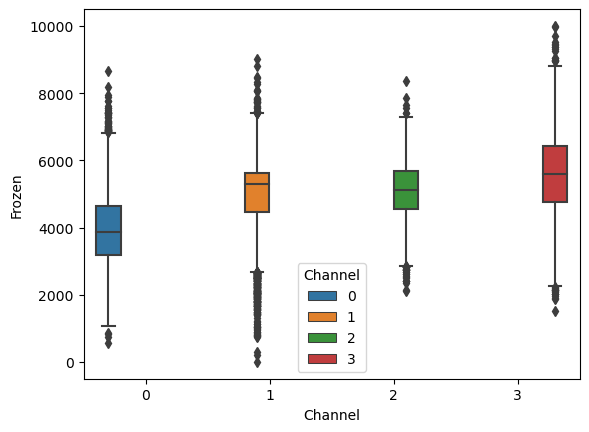

In [15]:
## Creating visualization of Frozen by Channel
sns.boxplot(x = 'Channel', y = 'Frozen', hue = 'Channel', data = marketing_data)

In [ ]:
# From the above chart, we can see that Retail has the lowest sales of Frozen items and Tv has the highest sales

In [16]:
#Defining input and target variables
X = marketing_data.drop(columns=['Channel'], axis=1)
Y = marketing_data['Channel']

## Splitting the data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size = .2, stratify = Y)

In [17]:
#Min-Max transformation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
## OneVSRest RF model
one_vs_all_RF = OneVsRestClassifier(estimator = RandomForestClassifier(n_estimators = 500, max_depth = 3)).fit(X_train, Y_train)

## Predicting on test
one_vs_all_RF_pred = one_vs_all_RF.predict_proba(X_test)
one_vs_all_RF_pred = np.argmax(one_vs_all_RF_pred, axis = 1) + 1

print(confusion_matrix(Y_test, one_vs_all_RF_pred))
print(classification_report(Y_test, one_vs_all_RF_pred))

[[  0 764 115  86  36]
 [  0 105 680 121  94]
 [  0 162  99 718  19]
 [  0  85  45  89 782]
 [  0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1001
           1       0.09      0.10      0.10      1000
           2       0.11      0.10      0.10       998
           3       0.09      0.09      0.09      1001
           4       0.00      0.00      0.00         0

    accuracy                           0.07      4000
   macro avg       0.06      0.06      0.06      4000
weighted avg       0.07      0.07      0.07      4000



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [21]:
## One vs Rest SVM
one_vs_all_svm = OneVsRestClassifier(estimator = SVC(kernel = 'rbf', C = 0.1, probability = True)).fit(X_train, Y_train)

## Predicting on test
one_vs_all_svm_pred = one_vs_all_svm.predict_proba(X_test)
one_vs_all_svm_pred = np.argmax(one_vs_all_svm_pred, axis = 1) + 1

print(confusion_matrix(Y_test, one_vs_all_svm_pred))
print(classification_report(Y_test, one_vs_all_svm_pred))

[[  0 833  98  49  21]
 [  0  97 791  57  55]
 [  0 116  97 773  12]
 [  0  64 111  61 765]
 [  0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1001
           1       0.09      0.10      0.09      1000
           2       0.09      0.10      0.09       998
           3       0.06      0.06      0.06      1001
           4       0.00      0.00      0.00         0

    accuracy                           0.06      4000
   macro avg       0.05      0.05      0.05      4000
weighted avg       0.06      0.06      0.06      4000



/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [22]:
## One vs One SVM 
one_vs_one_svm = OneVsOneClassifier(estimator = SVC(kernel = 'rbf', C = 0.1, probability = True)).fit(X_train, Y_train)

## Predicting on test
one_vs_one_svm_pred = one_vs_one_svm.predict(X_test)

print(confusion_matrix(Y_test, one_vs_one_svm_pred))
print(classification_report(Y_test, one_vs_one_svm_pred))

[[836  94  42  29]
 [ 88 816  53  43]
 [103  61 822  12]
 [ 72 142  43 744]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1001
           1       0.73      0.82      0.77      1000
           2       0.86      0.82      0.84       998
           3       0.90      0.74      0.81      1001

    accuracy                           0.80      4000
   macro avg       0.81      0.80      0.81      4000
weighted avg       0.81      0.80      0.81      4000



In [ ]:
# Based on my results, I would use the OneVsOne with SVM model to predict channel. In general it seemed the OneVsRest strategy
# was completely ineffective as I tried using RF and SVM with it and both were horrific results.